# 데이터 로드

In [82]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
!ls /content/gdrive/MyDrive/Sesac/

1_주요라이브러리.ipynb	   iris_dataset.csv
2_matplotlib.ipynb	   iris_preprocessing_done.csv
2_matplotlib_stu.ipynb	   No01_iris_data.ipynb
2_전처리.ipynb		   titanic_gender_submission.csv
3_인공지능_알고리즘.ipynb  titanic_test.csv
4_시스템설계.ipynb	   titanic_train.csv
iris_data_error.csv	   titanic_train_preprocessing_done.csv


In [84]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 파일 로드
colab_path = "/content/gdrive/My Drive/Sesac/"
df = pd.read_csv(colab_path + 'iris_data_error.csv')

In [85]:
# 로드된 데이터 확인
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,NaN,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 분석용 데이터 준비 - 결측치 처리

### 결측치 존재 확인

In [5]:
# 결측치 존재여부 확인
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,NaN,1.5,0.2
9,4.9,NaN,1.5,0.1
30,4.8,NaN,1.6,0.2
34,4.9,NaN,1.5,0.2
52,6.9,NaN,4.9,1.5
65,6.7,NaN,4.4,1.4
86,6.7,NaN,4.7,1.5
137,6.4,NaN,5.5,1.8
139,6.9,NaN,5.4,2.1
140,6.7,NaN,5.6,2.4


In [6]:
# True = 1로도 해석된다는 점을 이용하여 평균값 산정 (= Column별 결측치 비율)
chk = [pd.Series(df[d].isnull().value_counts()) for d in df]
print(chk)

[sepal_length
False    150
Name: count, dtype: int64, sepal_width
False    139
True      11
Name: count, dtype: int64, petal_length
False    150
Name: count, dtype: int64, petal_width
False    150
Name: count, dtype: int64]


In [7]:
# 결측치를 포함하는 데이터만 추출하여 확인
df.loc[df['sepal_width'].isnull() == True]

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,NaN,1.5,0.2
9,4.9,NaN,1.5,0.1
30,4.8,NaN,1.6,0.2
34,4.9,NaN,1.5,0.2
52,6.9,NaN,4.9,1.5
65,6.7,NaN,4.4,1.4
86,6.7,NaN,4.7,1.5
137,6.4,NaN,5.5,1.8
139,6.9,NaN,5.4,2.1
140,6.7,NaN,5.6,2.4


### 결측치 포함 데이터를 제외

In [8]:
del1 = df

In [9]:
# 결측치 포함한 데이터를 제거
del1 = del1.dropna()
del1[del1['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width


In [10]:
# 결측치를 제거한 나머지 데이터
del1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 결측치를 평균 값으로 대체

In [11]:
df_change_everage = df

In [31]:
# 대체할 값 계산
aver = np.average(del1['petal_length'])
aver = round(aver, 1)
aver

np.float64(5.3)

In [43]:
# 결측치 대체
df_change_everage = df_change_everage.fillna(aver)
df_change_everage

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,5.3,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 결측치를 이전/다음 값으로 대체

In [14]:
df_change_pre = df

In [15]:
# 결측치를 이전/다음 값으로 대체 - 최근방대치법
df_change_pre.ffill()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.2,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 분석용 데이터 준비 - 이상값 처리

### 이상값 처리 (IQR 기준)

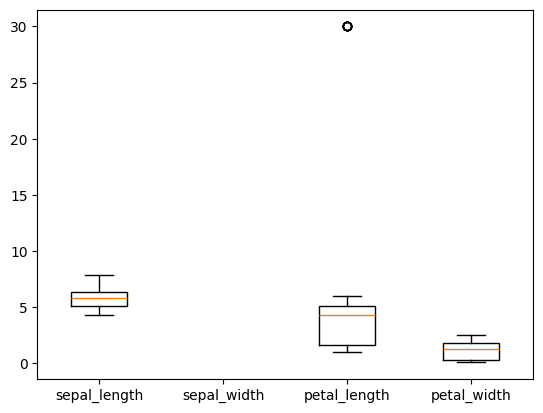

In [16]:
# 결측치 처리를 수행한 df_processed를 이어서 사용한다.
# Box Plot을 그려 시각적으로 확인해본다.
plt.boxplot([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
plt.xticks([1, 2, 3, 4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [17]:
# 시각적으로 Outlier을 포함하는 것으로 보이는 'petal_length'에 대해 이상치 확인
# 1사분위수보다 1.5 IQR보다 작거나 3사분위수보다 1.5 IQR보다 큰 수의 Boolean Array를 구한 후, 해당하는 데이터를 구한다
Q1 = np.percentile(df['petal_length'], 75, interpolation='nearest')
Q2 = np.percentile(df['petal_length'], 25, interpolation='nearest')
IQR = round(Q1 - Q2, 1)

df.loc[(df['petal_length'] < Q1 - IQR*3) | (df['petal_length'] > Q2 + IQR*3)]

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,30.0,2.1
107,7.3,2.9,30.0,1.8
109,7.2,3.6,30.0,2.5
117,7.7,3.8,30.0,2.2
118,7.7,2.6,30.0,2.3
122,7.7,2.8,30.0,2.0
130,7.4,2.8,30.0,1.9
131,7.9,3.8,30.0,2.0
135,7.7,3.0,30.0,2.3


## 이상값 제거

In [18]:
del2 = df

In [75]:
# 이상값 제거
del2 = del2.drop(del2.loc[(del2['petal_length'] < Q1 - IQR*3) | (del2['petal_length'] > Q2 + IQR*3)].index, axis=0)
del2.loc[(del2['petal_length'] < Q1 - IQR*3) | (del2['petal_length'] > Q2 + IQR*3)]

,sepal_length,sepal_width,petal_length,petal_width


### 이상값 처리 (z-score기준)

In [20]:
del3 = df

In [21]:
# petal_length 데이터 정규화 하기 (z-score 구하기)
# z-score : z = (원래 값 - feature의 평균) / feature의 표준편차
# mean() : 평균, std() : 표준편차, abs() : 절대값
z_score = (df['petal_length'] - df['petal_length'].mean()) / df['petal_length'].std()
z_score.to_frame()

,petal_length
0,-0.580225
1,-0.580225
2,-0.595608
3,-0.564843
4,-0.580225
...,...
145,0.004307
146,-0.026458
147,0.004307
148,0.035072


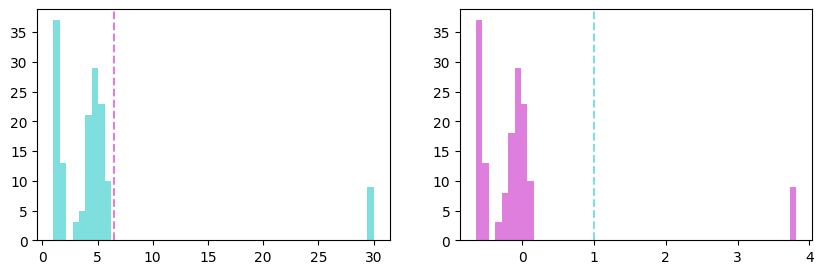

In [22]:
# z-score의 분포를 표준정규분포와 함께 plotting 하여 확인하기
fig, axes = plt.subplots(1, 2, figsize=(10, 3))


axes[0].hist(df['petal_length'], bins=50, color='c', alpha=0.5)
axes[0].axvline(df['petal_length'].std(), linestyle='dashed', color='m', alpha=0.5)
axes[1].hist(z_score, bins=50, color='m', alpha=0.5)
axes[1].axvline(z_score.std(), linestyle='dashed', color='c', alpha=0.5)
plt.show()

In [76]:
# 이상치 확인
z_score.loc[abs(z_score) > 3]

,petal_length
105,3.819149
107,3.819149
109,3.819149
117,3.819149
118,3.819149
122,3.819149
130,3.819149
131,3.819149
135,3.819149


In [29]:
# 이상치를 제거
del3 = del3.drop(del3.loc[abs(z_score) > 3].index, axis=0)
del3

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,NaN,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
# 이상치 제거 확인
del3.loc[(del3['petal_length'] < Q1 - IQR*3) | (del3['petal_length'] > Q2 + IQR*3)]

,sepal_length,sepal_width,petal_length,petal_width


# 전처리 데이터 확인 후 저장 및 로드

In [86]:
# data들의 평균으로 결측치 대체
aver = np.average(df['petal_length'])
aver = round(aver, 1)

df = df.fillna(aver)

In [87]:
# z-score 이상값 제거
z_score = (df['petal_length'] - df['petal_length'].mean()) / df['petal_length'].std()

df = df.drop(df.loc[abs(z_score) > 3].index, axis=0)

In [88]:
# 결측치 존재여부 확인
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width


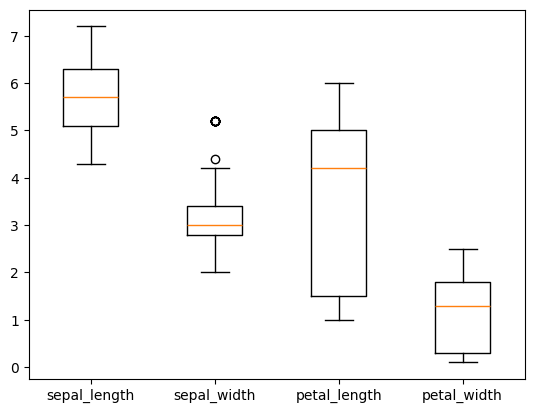

In [89]:
# 이상치 존재여부 확인
plt.boxplot([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
plt.xticks([1, 2, 3, 4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

spepal에도 이상값이 몇개 보이나, 충분히 가능한 범위 내이므로 pass

In [90]:
df.to_csv(f"{colab_path}iris_preprocessing_done.csv", index=False)

In [91]:
df = pd.read_csv(colab_path + 'iris_preprocessing_done.csv')

In [92]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,5.2,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
136,6.7,3.0,5.2,2.3
137,6.3,2.5,5.0,1.9
138,6.5,3.0,5.2,2.0
139,6.2,3.4,5.4,2.3


# 분석용 데이터 준비 - 데이터 정규화

In [26]:
from sklearn import preprocessing
# https://scikit-learn.org/stable/modules/preprocessing.html

# 결측치/이상치 처리를 수행한 df_processed2를 이어서 사용한다.
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [94]:
# z-score 스케일링 (표준 정규화)
df_zscore = df
scaler_zscore = preprocessing.StandardScaler()

scaler_zscore = scaler_zscore.fit(df[columns_to_scale])
df_zscore[columns_to_scale] = scaler_zscore.transform(df[columns_to_scale])
df_zscore

,sepal_length,sepal_width,petal_length,petal_width
0,-0.879514,0.393943,-1.306697,-1.264248
1,-1.157567,-0.298650,-1.306697,-1.264248
2,-1.435620,-0.021613,-1.366439,-1.264248
3,-1.574646,2.748760,-1.246955,-1.264248
4,-1.018541,0.532462,-1.306697,-1.264248
...,...,...,...,...
136,1.344907,-0.298650,0.963498,1.558857
137,0.788802,-0.991243,0.844014,1.021123
138,1.066855,-0.298650,0.963498,1.155557
139,0.649776,0.255424,1.082982,1.558857


In [95]:
# 표준 스케일링 (Min-Max 정규화)
df_minmax = df
scaler_minmax = preprocessing.MinMaxScaler()

scaler_minmax = scaler_minmax.fit(df[columns_to_scale])
df_minmax[columns_to_scale] = scaler_minmax.transform(df[columns_to_scale])
df_minmax

,sepal_length,sepal_width,petal_length,petal_width
0,0.275862,0.46875,0.08,0.041667
1,0.206897,0.31250,0.08,0.041667
2,0.137931,0.37500,0.06,0.041667
3,0.103448,1.00000,0.10,0.041667
4,0.241379,0.50000,0.08,0.041667
...,...,...,...,...
136,0.827586,0.31250,0.84,0.916667
137,0.689655,0.15625,0.80,0.750000
138,0.758621,0.31250,0.84,0.791667
139,0.655172,0.43750,0.88,0.916667


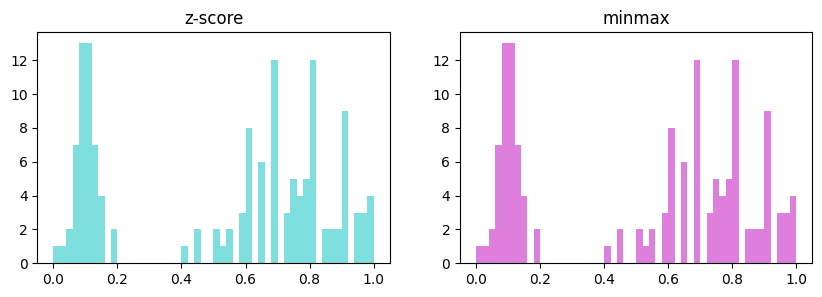

In [100]:
# 정규화 결과 비교
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].hist(df_zscore['petal_length'], bins=50, color='c', alpha=0.5)
axes[0].set_title('z-score')
axes[1].hist(df_minmax['petal_length'], bins=50, color='m', alpha=0.5)
axes[1].set_title('minmax')
plt.show()

# 탐색적 분석 - 산포도 분석

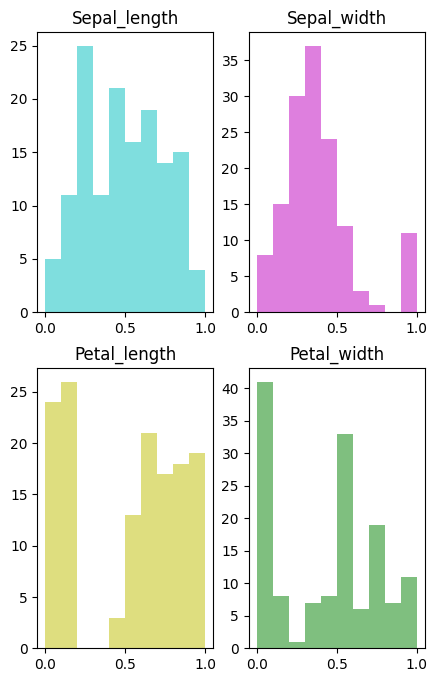

In [122]:
# 각 feature별 data 분포
fig, axes = plt.subplots(2, 2, figsize=(5, 8))

axes[0, 0].hist(df['sepal_length'], color='c', alpha=0.5)
axes[0, 0].set_title('Sepal_length')
axes[0, 1].hist(df['sepal_width'], color='m', alpha=0.5)
axes[0, 1].set_title('Sepal_width')
axes[1, 0].hist(df['petal_length'], color='y', alpha=0.5)
axes[1, 0].set_title('Petal_length')
axes[1, 1].hist(df['petal_width'], color='g', alpha=0.5)
axes[1, 1].set_title('Petal_width')
plt.show()

# 탐색적 분석 - 상관관계 분석

In [127]:
# 상관관계 계산
cols_to_corr = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[cols_to_corr].corr().round(5)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00000,-0.01191,0.85501,0.81671
sepal_width,-0.01191,1.00000,-0.27275,-0.22041
petal_length,0.85501,-0.27275,1.00000,0.96491
petal_width,0.81671,-0.22041,0.96491,1.00000


([<matplotlib.axis.YTick at 0x796a13c71650>,
 [Text(0, 0.5, 'sepal_length'),
  Text(0, 1.5, 'sepal_width'),
  Text(0, 2.5, 'petal_length'),
  Text(0, 3.5, 'petal_width')])

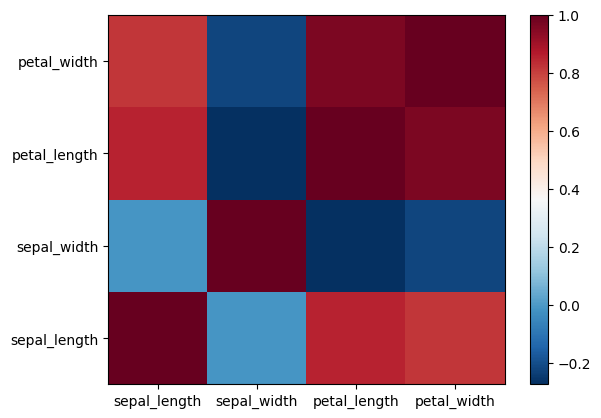

In [129]:
# 상관관계 시각화
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(df[cols_to_corr].corr().round(5), cmap='RdBu_r')
fig.colorbar(c, ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)